## Importing libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_excel("dataset1.xlsx")

In [15]:
df.head()

,Tahun,Umur Harapan Hidup saat Lahir (UHH),"Jumlah Sarana Kesehatan (Jumlah Rumah Sakit, Puskesmas, Puskesmas Pembantu Milik Pemerintah dan Pos Yandu)",Angka Buta Huruf,Angka Partisipasi Sekolah (SMA),Persentase Penduduk Miskin,PDRB atas harga yang berlaku (juta rupiah),Pengeluaran Perkapita (ribu rupiah/orang)
0,2020,65.75,2628,95,79.87,17.44,46.263.466,8732
1,2021,69.85,2695,95,79.68,17.87,48.893.675,8770
2,2022,70.16,2628,95,79.03,15.97,54.057.973,8876
3,2023,70.45,2695,95,79.90,16.42,58.489.794,9278


In [16]:
df.describe()

,Tahun,Umur Harapan Hidup saat Lahir (UHH),"Jumlah Sarana Kesehatan (Jumlah Rumah Sakit, Puskesmas, Puskesmas Pembantu Milik Pemerintah dan Pos Yandu)",Angka Buta Huruf,Angka Partisipasi Sekolah (SMA),Persentase Penduduk Miskin,Pengeluaran Perkapita (ribu rupiah/orang)
count,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.00000
mean,2021.500000,69.052500,2661.500000,95.0,79.620000,16.925000,8914.00000
std,1.290994,2.215256,38.682468,0.0,0.405216,0.880398,250.19992
min,2020.000000,65.750000,2628.000000,95.0,79.030000,15.970000,8732.00000
25%,2020.750000,68.825000,2628.000000,95.0,79.517500,16.307500,8760.50000
50%,2021.500000,70.005000,2661.500000,95.0,79.775000,16.930000,8823.00000
75%,2022.250000,70.232500,2695.000000,95.0,79.877500,17.547500,8976.50000
max,2023.000000,70.450000,2695.000000,95.0,79.900000,17.870000,9278.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Tahun                                                                                                       4 non-null      int64  
 1   Umur Harapan Hidup saat Lahir (UHH)                                                                         4 non-null      float64
 2   Jumlah Sarana Kesehatan (Jumlah Rumah Sakit, Puskesmas, Puskesmas Pembantu Milik Pemerintah dan Pos Yandu)  4 non-null      int64  
 3   Angka Buta Huruf                                                                                            4 non-null      int64  
 4   Angka Partisipasi Sekolah (SMA)                                          

## Data visualisation

<AxesSubplot: >

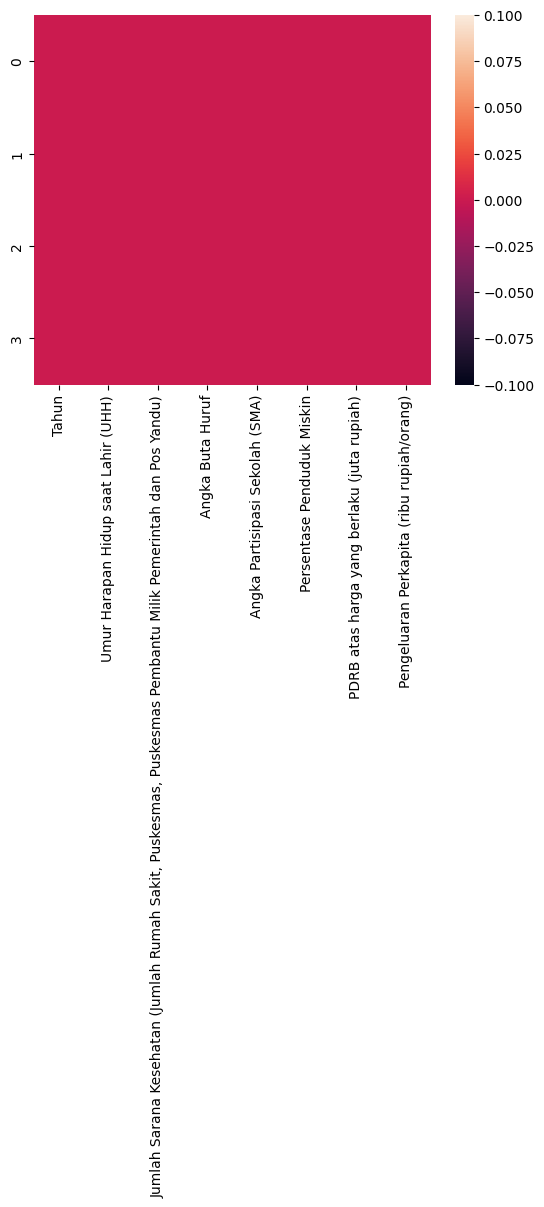

In [18]:
sns.heatmap(df.isnull())

In [20]:
y = df["Tahun"]
y

# Create a scatter plot matrix to visualize the correlations between features
fig = px.scatter_matrix(y, color='Tahun',height=1000,width=1000)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# Create a parallel coordinates plot to visualize the relationships between features and target
fig = px.parallel_coordinates(df, dimensions=boston.feature_names, color='target')
fig.show()

Text(0.5, 1.0, 'Correlation Heatmap')

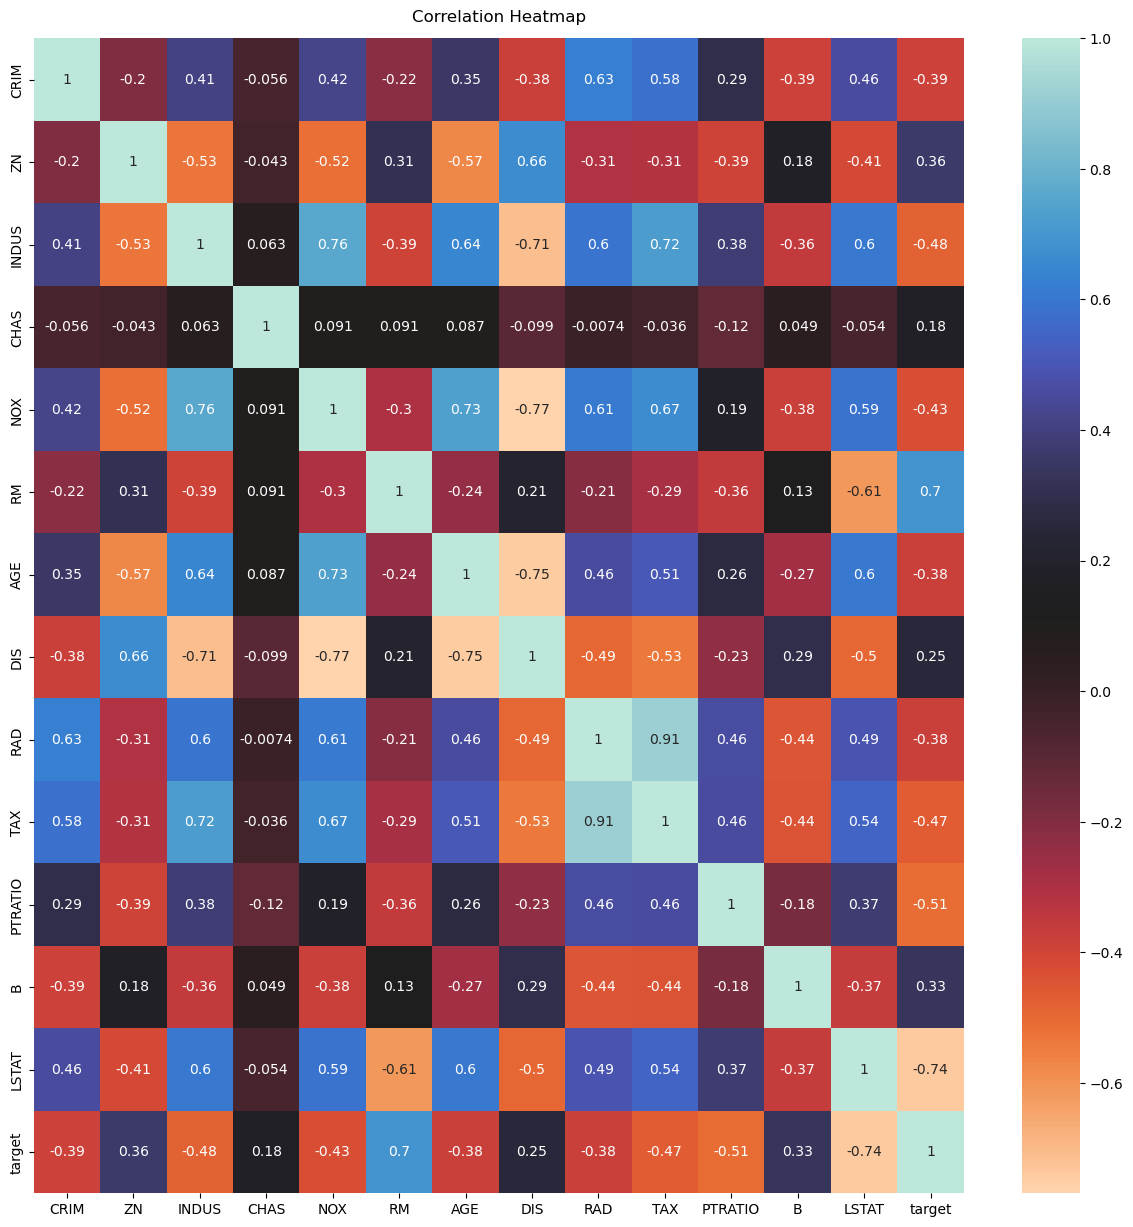

In [ ]:
# Create a heatmap to visualize the correlations between features and target
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(),annot=True,cmap="icefire_r")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Splitting the data

In [ ]:
X = df
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=56)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(152, 14)

## Linear regression

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression,X_train,y_train,scoring=  'neg_mean_squared_error',cv = 10)
mse

array([-3.40349655e-28, -6.84555963e-29, -2.60937657e-28, -2.25877173e-28,
       -7.98687858e-28, -1.21619813e-28, -4.42934129e-28, -2.39182626e-28,
       -2.81059871e-28, -1.82046558e-28])

In [ ]:
reg_prid = regression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(reg_prid,y_test)
score

# Ridge regression

In [ ]:
reg_regrecessor = Ridge()
# in order to find the value of hyperperameter alpha we will use GridsearchCV
parameter = {'alpha' :[1,2,3,4,5,6,7,8,9,10,20,0,40,50,60,90]}
ridgecv = GridSearchCV(reg_regrecessor,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 0, 40, 50,
                                   60, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 0}


In [ ]:
print(ridgecv.best_score_)

-2.4346520470364444e-28


In [ ]:
ridge_pred =  ridgecv.predict(X_test)

# Calculating the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,ridge_pred)
rmsqe=np.sqrt(mse)
rmsqe

1.76324874704579e-14

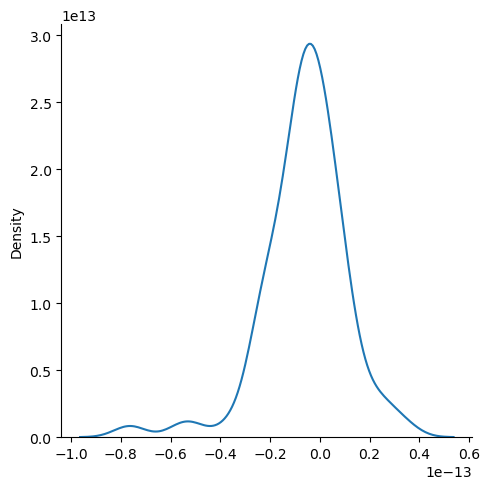

In [ ]:
sns.displot(ridge_pred-y_test,kind = 'kde')

In [ ]:
score = r2_score(ridge_pred,y_test)
score

1.0

# Lasso regression

In [ ]:
lasso = Lasso()
parameters ={'alpha':[1,2,5,10,11,20,25,30,50,0,100]}
lassocv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 11, 20, 25, 30, 50, 0, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)

{'alpha': 0}


In [ ]:
lasso_pred = lassocv.predict(X_test)

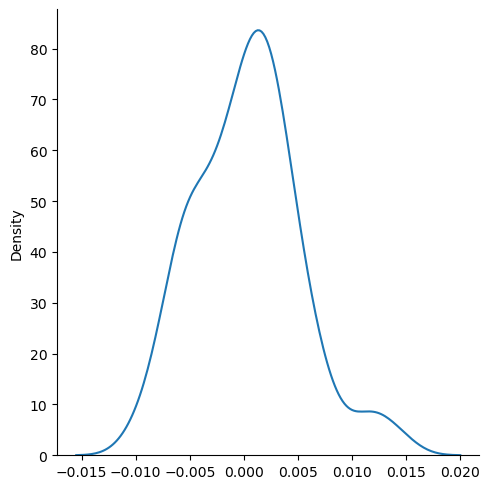

In [ ]:
sns.displot(lasso_pred-y_test,kind = 'kde')

In [ ]:
score = r2_score(lasso_pred,y_test)
score

0.9999997268436978

Note : refer to the post https://www.kaggle.com/discussions/general/391547#2164747 for detailed comparison of linear, ridge and lasso regression